In [1]:
from google.colab import files
uploaded = files.upload()


Saving retail_sales_dataset.csv to retail_sales_dataset.csv


In [12]:
#1.Data Loading and Cleaning
import pandas as pd
import numpy as np

# 1. Load data
df = pd.read_csv("retail_sales_dataset.csv")

# 2. Inspect structure
print(df.head())
print(df.info())
print(df.describe(include="all"))

# 3. Convert data types
df["Date"] = pd.to_datetime(df["Date"])

# 4. Check for missing values
print(df.isna().sum())

# 5. Handle duplicates (if any)
print("Duplicates before:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicates after:", df.duplicated().sum())

# 6. Create derived columns
df["Month"] = df["Date"].dt.month
df["YearMonth"] = df["Date"].dt.to_period("M")
df["Revenue_per_unit"] = df["Total Amount"] / df["Quantity"]


   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   obj

          Quantity  Price per Unit  Total Amount         Age
count  1000.000000     1000.000000   1000.000000  1000.00000
mean      2.514000      179.890000    456.000000    41.39200
std       1.132734      189.681356    559.997632    13.68143
min       1.000000       25.000000     25.000000    18.00000
25%       1.000000       30.000000     60.000000    29.00000
50%       3.000000       50.000000    135.000000    42.00000
75%       4.000000      300.000000    900.000000    53.00000
max       4.000000      500.000000   2000.000000    64.00000
Mode of Quantity: [4]
Mode of Price per Unit: [50]
Mode of Total Amount: [50]
Mode of Age: [43, 64]


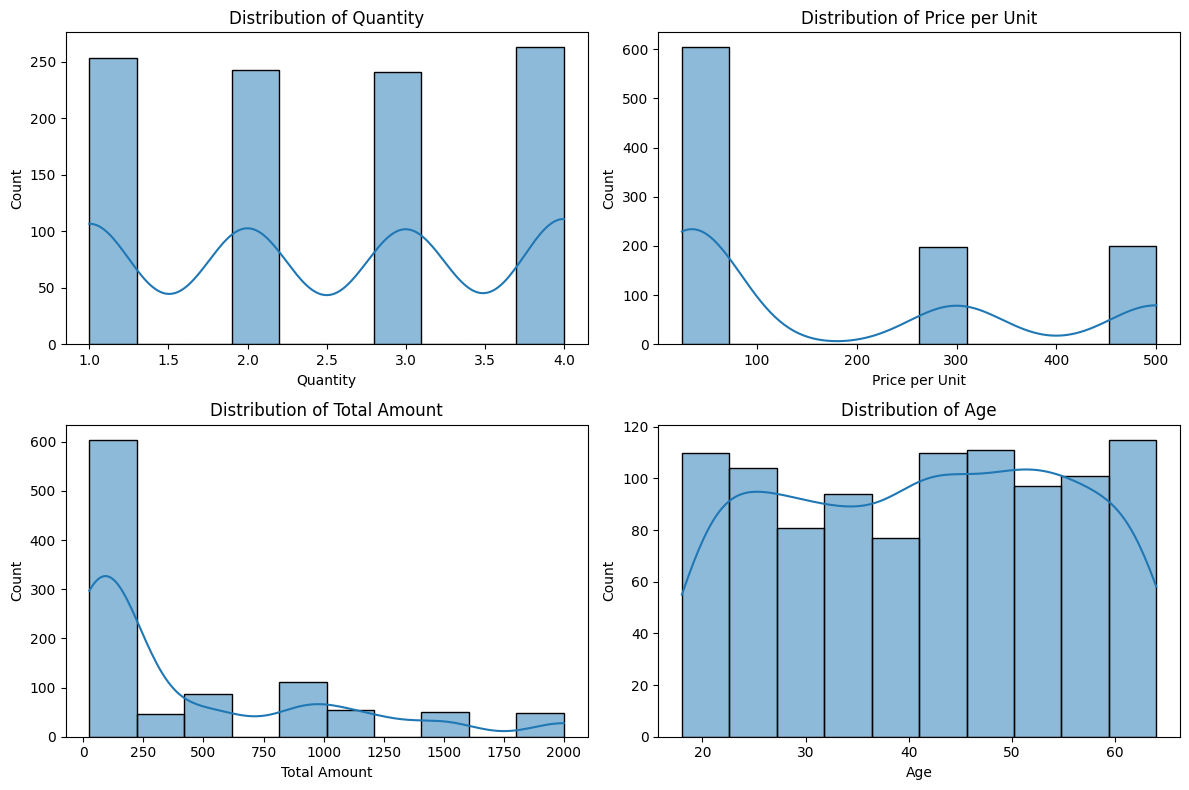

In [19]:
#2.Descriptive Statistics
# Numeric summary
num_cols = ["Quantity", "Price per Unit", "Total Amount", "Age"]
print(df[num_cols].describe())

# Mode for each numeric column
for col in num_cols:
    print(f"Mode of {col}:", df[col].mode().tolist())

# Histograms for distributions
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=col, kde=True, bins=10)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

Date
2023-01-31    35450
2023-02-28    44060
2023-03-31    28990
2023-04-30    33870
2023-05-31    53150
2023-06-30    36715
2023-07-31    35465
2023-08-31    36960
2023-09-30    23620
2023-10-31    46580
2023-11-30    34920
2023-12-31    44690
2024-01-31     1530
Freq: ME, Name: Total Amount, dtype: int64


/tmp/ipython-input-3777107450.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df_ts["Total Amount"].resample("M").sum()


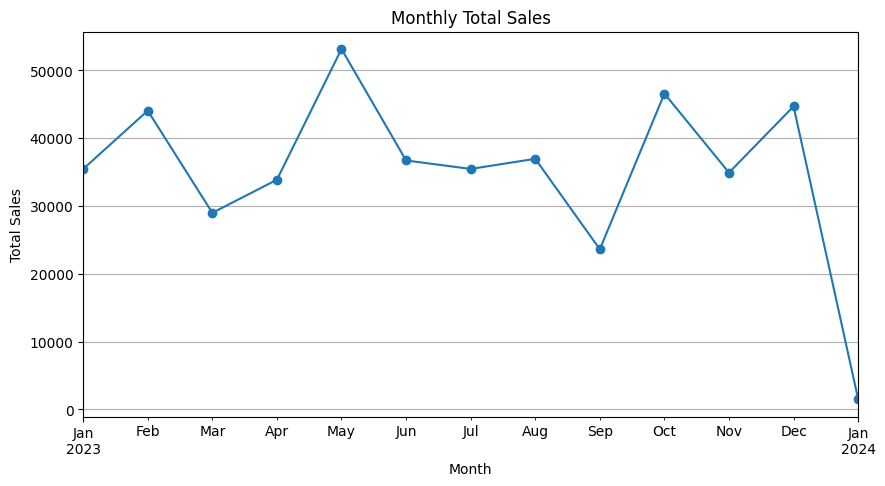

/tmp/ipython-input-3777107450.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_count = df_ts["Total Amount"].resample("M").count()


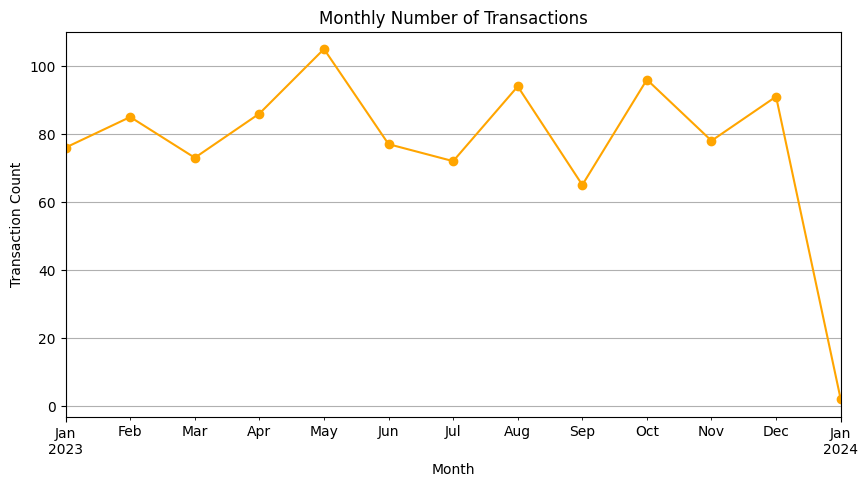

In [13]:
#3. Time Series Analysis
# Ensure Date is datetime and set as index (optional)
df = df.sort_values("Date")
df_ts = df.set_index("Date")

# Monthly total sales
monthly_sales = df_ts["Total Amount"].resample("M").sum()
print(monthly_sales)

# Plot monthly sales trend
plt.figure(figsize=(10, 5))
monthly_sales.plot(marker="o")
plt.title("Monthly Total Sales")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

# plot monthly transaction counts
monthly_count = df_ts["Total Amount"].resample("M").count()
plt.figure(figsize=(10, 5))
monthly_count.plot(marker="o", color="orange")
plt.title("Monthly Number of Transactions")
plt.xlabel("Month")
plt.ylabel("Transaction Count")
plt.grid(True)
plt.show()


In [14]:
#4.Customer and Product Analysis
# Revenue by product category
cat_sales = df.groupby("Product Category")["Total Amount"].agg(["sum", "mean", "count"])
print(cat_sales)

# Revenue by gender
gender_sales = df.groupby("Gender")["Total Amount"].agg(["sum", "mean", "count"])
print(gender_sales)

# Define age groups
bins = [17, 25, 35, 45, 55, 65]
labels = ["18-25", "26-35", "36-45", "46-55", "56-65"]
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, include_lowest=True)

# Revenue by age group
age_sales = df.groupby("AgeGroup")["Total Amount"].sum()
print(age_sales)

# Pivot for age group vs product category (for heatmap later)
age_cat_pivot = df.pivot_table(
    index="AgeGroup",
    columns="Product Category",
    values="Total Amount",
    aggfunc="sum",
    fill_value=0
)
print(age_cat_pivot)


                     sum        mean  count
Product Category                           
Beauty            143515  467.475570    307
Clothing          155580  443.247863    351
Electronics       156905  458.786550    342
           sum        mean  count
Gender                           
Female  232840  456.549020    510
Male    223160  455.428571    490
AgeGroup
18-25     84550
26-35     98480
36-45     91870
46-55    100690
56-65     80410
Name: Total Amount, dtype: int64
Product Category  Beauty  Clothing  Electronics
AgeGroup                                       
18-25              31280     26510        26760
26-35              31240     39975        27265
36-45              28405     29550        33915
46-55              34720     30485        35485
56-65              17870     29060        33480


/tmp/ipython-input-3628650571.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sales = df.groupby("AgeGroup")["Total Amount"].sum()
/tmp/ipython-input-3628650571.py:20: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  age_cat_pivot = df.pivot_table(


/tmp/ipython-input-55685133.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


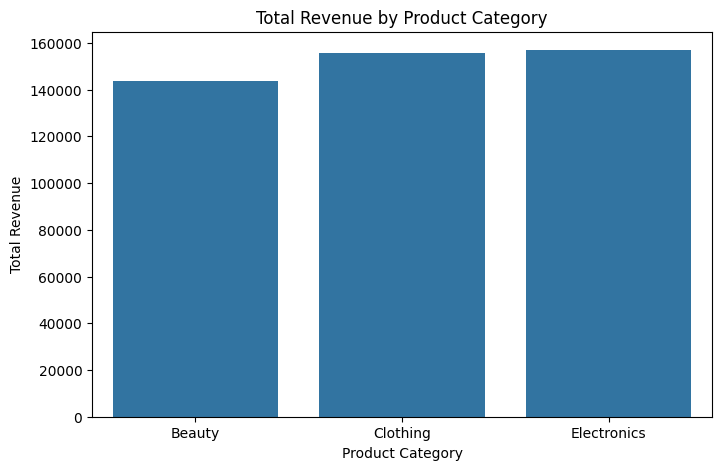

/tmp/ipython-input-55685133.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


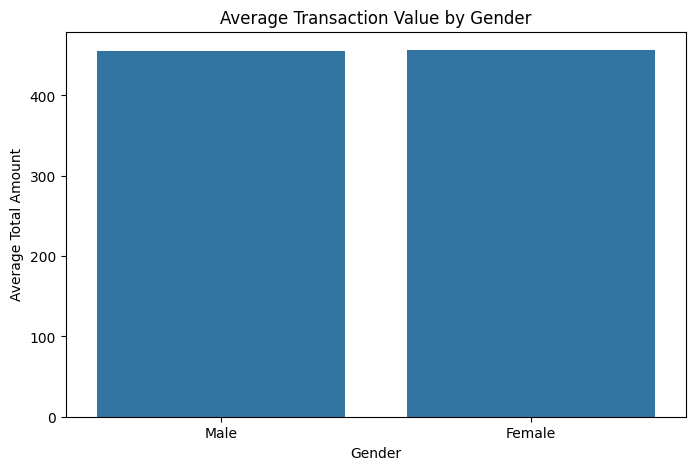

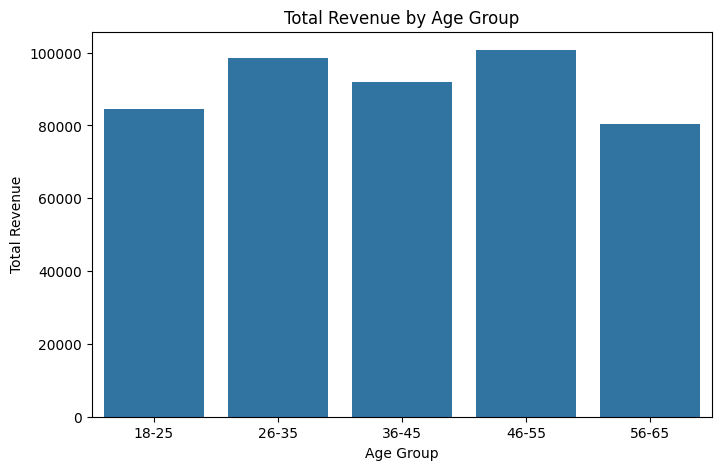

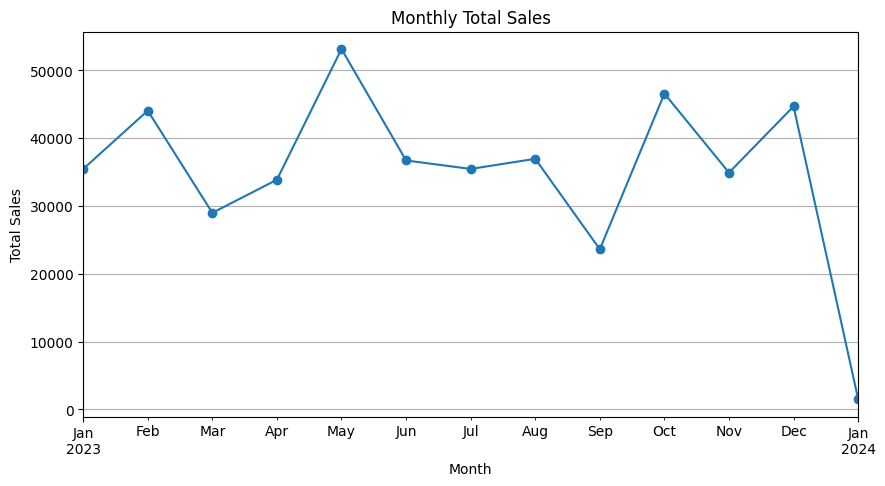

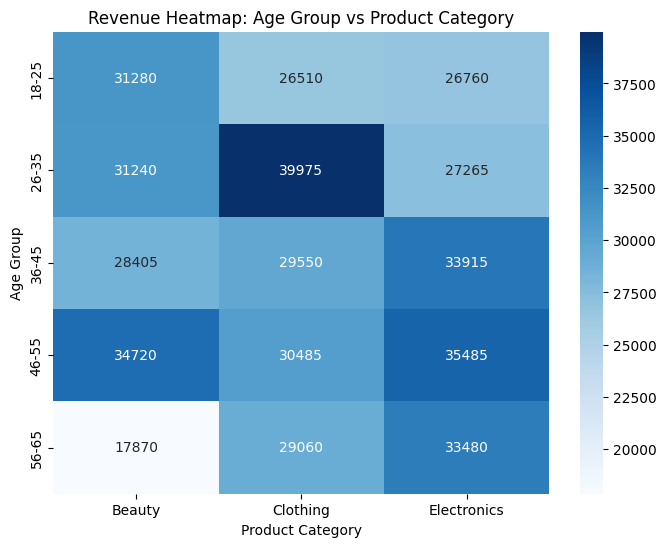

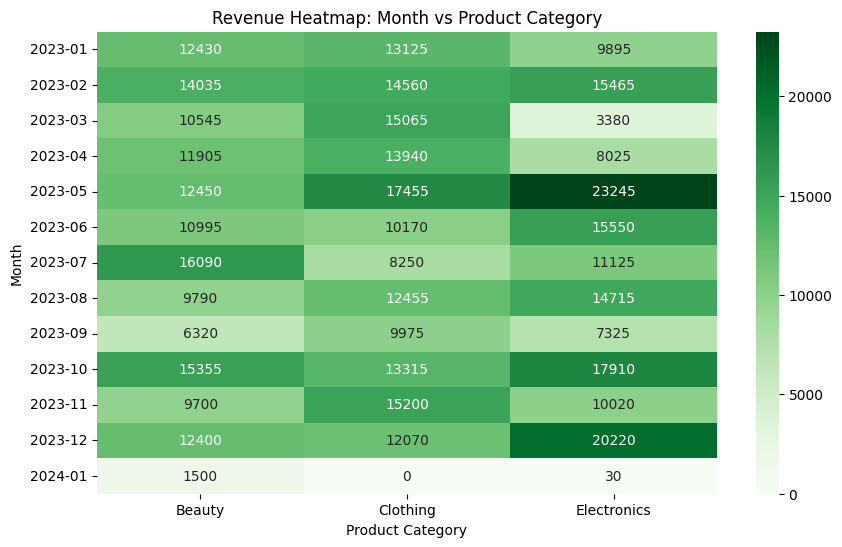

In [15]:
# 5.Visualizations
# Bar charts: revenue by product category
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df,
    x="Product Category",
    y="Total Amount",
    estimator=sum,
    ci=None
)
plt.title("Total Revenue by Product Category")
plt.ylabel("Total Revenue")
plt.show()

# Bar charts: average spend by gender
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df,
    x="Gender",
    y="Total Amount",
    estimator=np.mean,
    ci=None
)
plt.title("Average Transaction Value by Gender")
plt.ylabel("Average Total Amount")
plt.show()

# Bar charts: revenue by age group
plt.figure(figsize=(8, 5))
sns.barplot(
    x=age_sales.index,
    y=age_sales.values
)
plt.title("Total Revenue by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Revenue")
plt.show()

# Line plot of monthly sales (reuse monthly_sales from section 3)
plt.figure(figsize=(10, 5))
monthly_sales.plot(marker="o")
plt.title("Monthly Total Sales")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

# Heatmap: age group vs product category
plt.figure(figsize=(8, 6))
sns.heatmap(age_cat_pivot, annot=True, fmt=".0f", cmap="Blues")
plt.title("Revenue Heatmap: Age Group vs Product Category")
plt.ylabel("Age Group")
plt.xlabel("Product Category")
plt.show()

# Optional heatmap: month vs category
month_cat_pivot = df.pivot_table(
    index="YearMonth",
    columns="Product Category",
    values="Total Amount",
    aggfunc="sum",
    fill_value=0
)
plt.figure(figsize=(10, 6))
sns.heatmap(month_cat_pivot, annot=True, fmt=".0f", cmap="Greens")
plt.title("Revenue Heatmap: Month vs Product Category")
plt.ylabel("Month")
plt.xlabel("Product Category")
plt.show()


In [16]:
#6. Translating insights into recommendations
# Top categories and segments
top_cat = cat_sales["sum"].sort_values(ascending=False)
top_gender = gender_sales["sum"].sort_values(ascending=False)
top_age = age_sales.sort_values(ascending=False)
top_months = monthly_sales.sort_values(ascending=False)

print("Revenue by category:\n", top_cat)
print("\nRevenue by gender:\n", top_gender)
print("\nRevenue by age group:\n", top_age)
print("\nRevenue by month:\n", top_months)

Revenue by category:
 Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: sum, dtype: int64

Revenue by gender:
 Gender
Female    232840
Male      223160
Name: sum, dtype: int64

Revenue by age group:
 AgeGroup
46-55    100690
26-35     98480
36-45     91870
18-25     84550
56-65     80410
Name: Total Amount, dtype: int64

Revenue by month:
 Date
2023-05-31    53150
2023-10-31    46580
2023-12-31    44690
2023-02-28    44060
2023-08-31    36960
2023-06-30    36715
2023-07-31    35465
2023-01-31    35450
2023-11-30    34920
2023-04-30    33870
2023-03-31    28990
2023-09-30    23620
2024-01-31     1530
Name: Total Amount, dtype: int64
